In [1]:
import csv

import pandas as pd

fp = "aware_cf_2.0.csv"

In [2]:
with open(fp) as f:
    reader = csv.reader(f)
    data = [row for row in reader]

In [3]:
cfs = {}

In [4]:
categories = data[0][2:]

In [5]:
categories

['Agg_CF_irri_yearly',
 'Agg_CF_non_irri_yearly',
 'Agg_CF_unspecified_yearly',
 'Agg_CF_irri_jan',
 'Agg_CF_irri_feb',
 'Agg_CF_irri_mar',
 'Agg_CF_irri_apr',
 'Agg_CF_irri_may',
 'Agg_CF_irri_jun',
 'Agg_CF_irri_jul',
 'Agg_CF_irri_aug',
 'Agg_CF_irri_sep',
 'Agg_CF_irri_oct',
 'Agg_CF_irri_nov',
 'Agg_CF_irri_dec',
 'Agg_CF_non_irri_jan',
 'Agg_CF_non_irri_feb',
 'Agg_CF_non_irri_mar',
 'Agg_CF_non_irri_apr',
 'Agg_CF_non_irri_may',
 'Agg_CF_non_irri_jun',
 'Agg_CF_non_irri_jul',
 'Agg_CF_non_irri_aug',
 'Agg_CF_non_irri_sep',
 'Agg_CF_non_irri_oct',
 'Agg_CF_non_irri_nov',
 'Agg_CF_non_irri_dec',
 'Agg_CF_unspecified_jan',
 'Agg_CF_unspecified_feb',
 'Agg_CF_unspecified_mar',
 'Agg_CF_unspecified_apr',
 'Agg_CF_unspecified_may',
 'Agg_CF_unspecified_jun',
 'Agg_CF_unspecified_jul',
 'Agg_CF_unspecified_aug',
 'Agg_CF_unspecified_sep',
 'Agg_CF_unspecified_oct',
 'Agg_CF_unspecified_nov',
 'Agg_CF_unspecified_dec']

In [6]:
for c, category in enumerate(categories):
    cfs[category] = []
    for row in data[1:]:
        val = row[c+2]
        
        if val == 0 or val=='':
            continue

        val = float(val)
            
        cfs[category].extend([
            {
                "supplier": {
                    "name": "Water", "categories": ('water',), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val * -1
            },
            {
                "supplier": {
                    "name": "Water", "categories":	('water', 'surface water'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val * -1
            },
            {
                "supplier": {
                    "name": "Water", "categories":	('water', 'ground-'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val * -1
            },
            {
                "supplier": {
                    "name": "Water, cooling, unspecified natural origin", "categories": ('natural resource', 'in water'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val
            },
            {
                "supplier": {
                    "name": "Water, lake", "categories":	('natural resource', 'in water'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val
            },
            {
                "supplier": {
                    "name": "Water, river", "categories":	('natural resource', 'in water'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val
            },
            {
                "supplier": {
                    "name": "Water, turbine use, unspecified natural origin", "categories": 	('natural resource', 'in water'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val
            },
            {
                "supplier": {
                    "name": "Water, unspecified natural origin", "categories": 	('natural resource', 'in water'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val
            },
            {
                "supplier": {
                    "name": "Water, well, in ground", "categories": ('natural resource', 'in water'), "matrix": "biosphere"
                }, "consumer": {
                    "location": row[1], "matrix": "technosphere"
                }, "value": val
            },
        ])


In [7]:
pd.set_option('future.no_silent_downcasting', True)
worksheets = {
    "Agg_CF_irri": "pHWC_agri",
    "Agg_CF_non_irri": "pHWC_nonagri",
    "Agg_CF_unspecified": "pHWC_all",
}

column_names = {
    "yearly":"Annual",
    "jan":"Jan",
    "feb":"Feb",
    "mar":"Mar",
    "apr":"Apr",
    "may":"May",
    "jun":"Jun",
    "jul":"Jul",
    "aug":"Aug",
    "sep":"Sep",
    "oct":"Oct",
    "nov":"Nov",
    "dec":"Dec",
}

for category, cf in cfs.items():

    sheet_name = [v for k, v in worksheets.items() if category.startswith(k)][0]

    # read Excel, but ignore 5 first columns
    weight = pd.read_excel(
        "AWARE20_Countries_and_Regions.xlsx",
        sheet_name=sheet_name,
        usecols=[i for i in range(5, 19)],
    )

    weight.set_index("ecoinvent_shortname", inplace=True)

    weight = weight.replace("NotDefined", 0.0)

    col_name = column_names[category.split("_")[-1]]
    weight = weight.loc[:, col_name]

    # turn dataframe to dictionary, using index as keys
    water_use_dict = weight.to_dict()

    for c in cf:
        print(f"{c['consumer']['location']}: {water_use_dict.get(c['consumer']['location'], 0)}")
        c["weight"] = water_use_dict.get(c["consumer"]["location"], 0)


AD: 672409
AD: 672409
AD: 672409
AD: 672409
AD: 672409
AD: 672409
AD: 672409
AD: 672409
AD: 672409
AE: 213938000
AE: 213938000
AE: 213938000
AE: 213938000
AE: 213938000
AE: 213938000
AE: 213938000
AE: 213938000
AE: 213938000
AF: 16144500000
AF: 16144500000
AF: 16144500000
AF: 16144500000
AF: 16144500000
AF: 16144500000
AF: 16144500000
AF: 16144500000
AF: 16144500000
AG: 488072
AG: 488072
AG: 488072
AG: 488072
AG: 488072
AG: 488072
AG: 488072
AG: 488072
AG: 488072
AL: 394084000
AL: 394084000
AL: 394084000
AL: 394084000
AL: 394084000
AL: 394084000
AL: 394084000
AL: 394084000
AL: 394084000
AM: 799882000
AM: 799882000
AM: 799882000
AM: 799882000
AM: 799882000
AM: 799882000
AM: 799882000
AM: 799882000
AM: 799882000
AO: 162770000
AO: 162770000
AO: 162770000
AO: 162770000
AO: 162770000
AO: 162770000
AO: 162770000
AO: 162770000
AO: 162770000
AR: 8425190000
AR: 8425190000
AR: 8425190000
AR: 8425190000
AR: 8425190000
AR: 8425190000
AR: 8425190000
AR: 8425190000
AR: 8425190000
AT: 89401200
AT: 89

In [8]:
cfs["Agg_CF_non_irri_jun"]

[{'supplier': {'name': 'Water',
   'categories': ('water',),
   'matrix': 'biosphere'},
  'consumer': {'location': 'AD', 'matrix': 'technosphere'},
  'value': -18.5,
  'weight': 30307.8},
 {'supplier': {'name': 'Water',
   'categories': ('water', 'surface water'),
   'matrix': 'biosphere'},
  'consumer': {'location': 'AD', 'matrix': 'technosphere'},
  'value': -18.5,
  'weight': 30307.8},
 {'supplier': {'name': 'Water',
   'categories': ('water', 'ground-'),
   'matrix': 'biosphere'},
  'consumer': {'location': 'AD', 'matrix': 'technosphere'},
  'value': -18.5,
  'weight': 30307.8},
 {'supplier': {'name': 'Water, cooling, unspecified natural origin',
   'categories': ('natural resource', 'in water'),
   'matrix': 'biosphere'},
  'consumer': {'location': 'AD', 'matrix': 'technosphere'},
  'value': 18.5,
  'weight': 30307.8},
 {'supplier': {'name': 'Water, lake',
   'categories': ('natural resource', 'in water'),
   'matrix': 'biosphere'},
  'consumer': {'location': 'AD', 'matrix': 'tech

In [9]:
# save each category as a separate json file
import json

for category in categories:
    with open(f"/Users/romain/GitHub/edges/edges/data/AWARE 2.0_{category.replace('_CF', '').replace('Agg', 'Country')}.json", "w") as f:
        print(f"Saving {category.replace('_CF', '').replace('Agg', 'Country')}")
        json.dump(cfs[category], f)

Saving Country_irri_yearly
Saving Country_non_irri_yearly
Saving Country_unspecified_yearly
Saving Country_irri_jan
Saving Country_irri_feb
Saving Country_irri_mar
Saving Country_irri_apr
Saving Country_irri_may
Saving Country_irri_jun
Saving Country_irri_jul
Saving Country_irri_aug
Saving Country_irri_sep
Saving Country_irri_oct
Saving Country_irri_nov
Saving Country_irri_dec
Saving Country_non_irri_jan
Saving Country_non_irri_feb
Saving Country_non_irri_mar
Saving Country_non_irri_apr
Saving Country_non_irri_may
Saving Country_non_irri_jun
Saving Country_non_irri_jul
Saving Country_non_irri_aug
Saving Country_non_irri_sep
Saving Country_non_irri_oct
Saving Country_non_irri_nov
Saving Country_non_irri_dec
Saving Country_unspecified_jan
Saving Country_unspecified_feb
Saving Country_unspecified_mar
Saving Country_unspecified_apr
Saving Country_unspecified_may
Saving Country_unspecified_jun
Saving Country_unspecified_jul
Saving Country_unspecified_aug
Saving Country_unspecified_sep
Savin

In [10]:
yearly_irri = cfs['Agg_CF_irri_yearly']
yearly_non_irri = cfs['Agg_CF_non_irri_yearly']
yearly_unspecified = cfs['Agg_CF_unspecified_yearly']

In [11]:
for cf in yearly_irri:
    cf["consumer"]["classifications"] = {
        "CPC": [
            '01',
        ]
    }

for cf in yearly_non_irri:
    cf["consumer"]["classifications"] = {
        "CPC": [
            '02',
            '03',
            '04',
            '1',
            '2',
            '3',
            '4',
            '5',
            '6',
            '7',
            '8',
            '9',
        ]
    }

In [12]:
# save each category as a separate json file
import json


with open(f"/Users/romain/GitHub/edges/edges/data/AWARE 2.0_Country_all_yearly.json", "w") as f:
    json.dump(yearly_irri + yearly_non_irri + yearly_unspecified, f)

In [16]:
import geopandas as gpd

fp = "AWARE20_Native_CFs_geospatial.gpkg"
# Read the GeoPackage file
gdf = gpd.read_file(fp, layer="AWARE20_Native_CFs_geospatial")

# Preview the first few rows
print(gdf.head())


   CF_Jan  CF_Feb  CF_Mar  CF_Apr  CF_May  CF_Jun  CF_Jul  CF_Aug  CF_Sep  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   CF_Oct  CF_Nov  CF_Dec  CF_annual_unspecified  CF_annual_agri  \
0     NaN     NaN     NaN                    NaN             NaN   
1     NaN     NaN     NaN                    NaN             NaN   
2     NaN     NaN     NaN                    NaN             NaN   
3     NaN     NaN     NaN                    NaN             NaN   
4     NaN     NaN     NaN                    NaN             NaN   

   CF_annual_nonagri                                           geometry  
0                NaN  MULTIPOLYGON (((-38 84, -37.5 84

In [17]:
gdf.columns

Index(['CF_Jan', 'CF_Feb', 'CF_Mar', 'CF_Apr', 'CF_May', 'CF_Jun', 'CF_Jul',
       'CF_Aug', 'CF_Sep', 'CF_Oct', 'CF_Nov', 'CF_Dec',
       'CF_annual_unspecified', 'CF_annual_agri', 'CF_annual_nonagri',
       'geometry'],
      dtype='object')

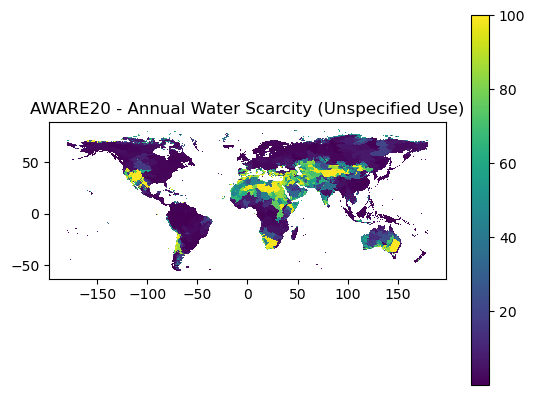

In [18]:
import matplotlib.pyplot as plt

gdf.plot(column="CF_annual_unspecified", legend=True)
plt.title("AWARE20 - Annual Water Scarcity (Unspecified Use)")
plt.show()


In [31]:
import geopandas as gpd

# Load your AWARE basins
gdf = gpd.read_file("AWARE20_Native_CFs_geospatial.gpkg", layer="AWARE20_Native_CFs_geospatial")

# Load world countries from Natural Earth
world = gpd.read_file("ne_110m_admin_0_countries")

# Spatial join: assign each basin to the country it falls into
gdf_country = gpd.sjoin(gdf, world[['geometry', 'ISO_A2', 'ADMIN']], how="left", predicate="intersects")

print(len(gdf_country))

12730


In [37]:
gdf_country = gdf_country[gdf_country['ISO_A2'].notnull()]
gdf_country = gdf_country[gdf_country['ISO_A2']!="-99"]
gdf_country = gdf_country[gdf_country['CF_annual_unspecified'].notnull()]

In [38]:
print(len(gdf_country))

9120


In [40]:
gdf_country.columns

Index(['CF_Jan', 'CF_Feb', 'CF_Mar', 'CF_Apr', 'CF_May', 'CF_Jun', 'CF_Jul',
       'CF_Aug', 'CF_Sep', 'CF_Oct', 'CF_Nov', 'CF_Dec',
       'CF_annual_unspecified', 'CF_annual_agri', 'CF_annual_nonagri',
       'geometry', 'index_right', 'ISO_A2', 'ADMIN'],
      dtype='object')

In [39]:
gdf_country

,CF_Jan,CF_Feb,CF_Mar,CF_Apr,CF_May,CF_Jun,CF_Jul,CF_Aug,CF_Sep,CF_Oct,CF_Nov,CF_Dec,CF_annual_unspecified,CF_annual_agri,CF_annual_nonagri,geometry,index_right,ISO_A2,ADMIN
177,100.000,100.000,100.000,100.00,100.000,1.550,1.570,3.570,15.60,54.500,100.000,100.000,64.700,64.700,64.700,"MULTIPOLYGON (((-89.5 82, -89 82, -89 81.5, -8...",3.0,CA,Canada
300,100.000,100.000,100.000,100.00,33.200,0.390,0.528,6.290,12.40,57.700,100.000,100.000,59.200,59.200,59.200,"MULTIPOLYGON (((-13.5 81.5, -13 81.5, -13 81, ...",22.0,GL,Greenland
375,100.000,100.000,100.000,100.00,92.900,0.669,0.494,1.340,10.40,38.700,100.000,100.000,62.000,62.000,62.000,"MULTIPOLYGON (((-71.5 80.5, -71 80.5, -71 80, ...",3.0,CA,Canada
377,46.700,60.900,64.000,76.30,62.200,1.300,0.472,1.250,12.90,22.400,32.300,39.000,35.000,35.000,35.000,"MULTIPOLYGON (((-70 80, -70.5 80, -70.5 80.5, ...",3.0,CA,Canada
407,63.900,78.000,77.000,87.10,46.900,1.060,1.360,3.400,12.50,35.900,51.400,56.600,42.900,42.900,42.900,"MULTIPOLYGON (((-73 80, -72.5 80, -72.5 79.5, ...",3.0,CA,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,0.723,0.615,0.745,1.21,1.530,2.360,3.590,3.600,1.81,2.340,1.770,1.050,1.790,1.780,1.790,"MULTIPOLYGON (((-76 35.5, -75.5 35.5, -75.5 35...",4.0,US,United States of America
11650,100.000,100.000,100.000,100.00,27.800,0.866,7.040,5.080,4.50,34.800,100.000,100.000,56.700,56.700,56.700,"MULTIPOLYGON (((-77 69, -76.5 69, -76.5 68.5, ...",3.0,CA,Canada
11654,22.000,42.000,60.800,8.27,1.080,0.725,1.870,2.750,1.86,1.650,2.500,7.120,12.700,12.700,12.700,"MULTIPOLYGON (((-55 70.5, -54.5 70.5, -54.5 70...",22.0,GL,Greenland
11657,100.000,100.000,100.000,100.00,100.000,0.593,4.190,2.860,4.89,100.000,100.000,100.000,67.700,67.700,67.700,"MULTIPOLYGON (((-89 70.5, -88.5 70.5, -88.5 70...",3.0,CA,Canada


In [41]:
# Project to an equal-area CRS (important for correct area calculation)
gdf_projected = gdf_country.to_crs("EPSG:6933")  # Equal Earth projection

# Calculate area in square meters
gdf_projected["area_m2"] = gdf_projected.geometry.area


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Initialize results list
results = []

countries = gdf_projected['ISO_A2'].dropna().unique()

for country in countries:
    subset = gdf_projected[gdf_projected['ISO_A2'] == country]

    values = subset['CF_annual_unspecified']
    weights = subset['area_m2']
    n_basins = len(subset)

    # Expand the data by weights
    weights_normalized = (weights / weights.max() * 100).astype(int)
    expanded_values = np.repeat(values, weights_normalized)

    # Fit distributions
    distributions = {
        "norm": stats.norm,
        "lognorm": stats.lognorm,
        "gamma": stats.gamma,
        "beta": stats.beta,
        "weibull_min": stats.weibull_min,
        "triang": stats.triang,
        "pearson3": stats.pearson3,
    }

    best_fit = None
    best_name = None
    best_sse = np.inf  # sum of squared errors

    x = np.linspace(values.min(), values.max(), 100)

    for name, dist in distributions.items():
        try:
            # Fit distribution to expanded (area-weighted) data
            params = dist.fit(expanded_values)

            # Compute the PDF at x points
            if name == "lognorm":
                s, loc, scale = params
                pdf = dist.pdf(x, s, loc, scale)
            elif name == "gamma":
                a, loc, scale = params
                pdf = dist.pdf(x, a, loc, scale)
            elif name == "beta":
                a, b, loc, scale = params
                pdf = dist.pdf(x, a, b, loc, scale)
            elif name == "weibull_min":
                c, loc, scale = params
                pdf = dist.pdf(x, c, loc, scale)
            elif name == "triang":
                c, loc, scale = params
                pdf = dist.pdf(x, c, loc, scale)
            elif name == "pearson3":
                skew, loc, scale = params
                pdf = dist.pdf(x, skew, loc, scale)
            else:  # normal
                loc, scale = params
                pdf = dist.pdf(x, loc, scale)

            # Compare fitted PDF to actual histogram
            hist_counts, bin_edges = np.histogram(expanded_values, bins=30, density=True)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            pdf_at_bins = dist.pdf(bin_centers, *params)
            sse = np.sum((hist_counts - pdf_at_bins)**2)

            if sse < best_sse:
                best_sse = sse
                best_fit = (name, params, pdf)
                best_name = name

        except Exception as e:
            # If fitting fails for this distribution, continue
            continue

    # Dynamic threshold based on basin number
    if n_basins > 100:
        sse_threshold = 0.02
    elif n_basins > 30:
        sse_threshold = 0.05
    else:
        sse_threshold = 0.08

    # Decision: Good fit or fallback
    if best_fit and best_sse <= sse_threshold:
        chosen_dist = best_name
        chosen_params = best_fit[1]
    else:
        chosen_dist = "uniform"
        min_val = expanded_values.min()
        max_val = expanded_values.max()
        chosen_params = (min_val, max_val)

    # Compute area-weighted mean CF
    mean_cf = np.average(values, weights=weights)

    # Save result
    results.append({
        "country": country,
        "n_basins": n_basins,
        "distribution": chosen_dist,
        "parameters": chosen_params,
        "mean_CF": mean_cf
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

# (Optional) save to CSV
results_df.to_csv("distribution_summary_per_country.csv", index=False)


/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(

    country  n_basins distribution  \
0        CA      1151  weibull_min   
1        GL       186     pearson3   
2        RU      1210      lognorm   
3        US       612      lognorm   
4        FI        51      uniform   
..      ...       ...          ...   
166      LS         4       triang   
167      UY        13      uniform   
168      NZ        93         beta   
169      FK        18      uniform   
170      TF        10      uniform   

                                            parameters    mean_CF  
0    (0.7897238294077022, 0.4919999999999999, 2.674...   5.308292  
1    (2.3457203239606006, 14.21298748068577, 16.296...  17.292670  
2    (1.2135253090673448, 0.021833767744265247, 3.5...   8.595020  
3    (1.8611345151734509, 0.21084338051397183, 3.93...  19.819509  
4                                         (1.15, 5.01)   1.560885  
..                                                 ...        ...  
166  (0.9997686075217072, -5.896739395756736, 104.5...  86.522762  

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats

# Assume `results_df` and `gdf_projected` are already created

# First: Map country to histogram data
country_hist_data = {}

countries = gdf_projected['ISO_A2'].dropna().unique()

for country in countries:
    subset = gdf_projected[gdf_projected['ISO_A2'] == country]

    values = subset['CF_annual_unspecified']
    weights = subset['area_m2']
    country_hist_data[country] = (values, weights)

# Now, plot
n_countries = len(results_df)
cols = 13
rows = int(np.ceil(n_countries / cols))

fig, axes = plt.subplots(rows, cols, figsize=(50, 50), dpi=500)
axes = axes.flatten()

for idx, row in results_df.iterrows():
    ax = axes[idx]

    country = row['country']
    dist_name = row['distribution']
    params = row['parameters']
    mean_cf = row['mean_CF']

    values, weights = country_hist_data[country]

    # Plot weighted histogram
    ax.hist(values, bins=30, weights=weights, density=True, edgecolor='black', alpha=0.6)

    # Plot fitted distribution
    x_min, x_max = values.min(), values.max()
    x = np.linspace(x_min, x_max, 100)

    if dist_name == "uniform":
        min_val, max_val = params
        pdf = np.ones_like(x) / (max_val - min_val)
        pdf[(x < min_val) | (x > max_val)] = 0
    else:
        try:
            dist = getattr(stats, dist_name)
            if dist_name == "lognorm":
                s, loc, scale = params
                pdf = dist.pdf(x, s, loc, scale)
            elif dist_name == "gamma":
                a, loc, scale = params
                pdf = dist.pdf(x, a, loc, scale)
            elif dist_name == "beta":
                a, b, loc, scale = params
                pdf = dist.pdf(x, a, b, loc, scale)
            elif dist_name == "weibull_min":
                c, loc, scale = params
                pdf = dist.pdf(x, c, loc, scale)
            elif dist_name == "triang":
                c, loc, scale = params
                pdf = dist.pdf(x, c, loc, scale)
            elif dist_name == "pearson3":
                skew, loc, scale = params
                pdf = dist.pdf(x, skew, loc, scale)
            else:  # normal
                loc, scale = params
                pdf = dist.pdf(x, loc, scale)
        except Exception:
            pdf = np.zeros_like(x)

    ax.plot(x, pdf, 'r-', linewidth=1)

    # Annotation
    param_text = ', '.join([f"{p:.2f}" for p in params]) if isinstance(params, (list, tuple)) else str(params)
    ax.text(0.05, 0.95, f"{country}\n{dist_name}\n{param_text}\nmean={mean_cf:.2f}",
            transform=ax.transAxes, fontsize=6, va='top', ha='left', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

    ax.set_xlim(0, 100)  # Adjust if needed
    ax.set_ylim(0, None)

    # Inside the plotting loop, after plotting
    row_idx = idx // cols
    col_idx = idx % cols

    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=6)


    # Only show y-ticks on leftmost column
    if col_idx == 0:
        ax.set_yticks([0, 0.01, 0.02])  # Adjust depending on histogram heights
        ax.set_yticklabels([0, 0.01, 0.02], fontsize=6)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])

# Hide any empty plots
for idx in range(n_countries, len(axes)):
    axes[idx].axis('off')

# Adjust layout carefully
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Save high-res PDF
plt.savefig("aware_CF_country_distributions.pdf", bbox_inches='tight')
plt.close()

print("✅ Giant multi-country plot saved as aware_CF_country_distributions.pdf")


/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_11320/3772274975.py:47: RuntimeWarning: divide by zero encountered in divide
  pdf = np.ones_like(x) / (max_val - min_val)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_11320/3772274975.py:47: RuntimeWarning: divide by zero encountered in divide
  pdf = np.ones_like(x) / (max_val - min_val)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_11320/3772274975.py:47: RuntimeWarning: divide by zero encountered in divide
  pdf = np.ones_like(x) / (max_val - min_val)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_11320/3772274975.py:47: RuntimeWarning: divide by zero encountered in divide
  pdf = np.ones_like(x) / (max_val - min_val)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_11320/3772274975.py:47: RuntimeWarning: divide by zero encountered in divide
  pdf = np.ones_like(x) / (max_val - min_val)


✅ Giant multi-country plot saved as aware_CF_country_distributions.pdf
